In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Excel sheets into pandas DataFrames


In [2]:
actuals_df = pd.read_excel('actuals.xlsx')
target_df = pd.read_excel('target.xlsx')
price_df = pd.read_excel('price.xlsx')
bcr_df = pd.read_excel('bcr.xlsx')

### Remove unnecessary columns

In [3]:
# Data Cleaning
actuals_df = actuals_df[['Material Description', 'Plant', 'Period', 'Year', 'Amount in LC', 'Quantity']]
target_df = target_df[['Year', 'Period', 'Plant', 'Material Number', 'Target Value in LC', 'Target Quantity']]
price_df = price_df[['Plant', 'Material Description', ' Price per case ']]
bcr_df = bcr_df[['Unnamed: 0', 'Bottle', 'Crate']]


### Remove duplicate rows from each DataFrame



In [4]:
actuals_df = actuals_df.drop_duplicates()
target_df = target_df.drop_duplicates()
price_df = price_df.drop_duplicates()
bcr_df = bcr_df.drop_duplicates()

# Reset the index for each DataFrame
actuals_df = actuals_df.reset_index(drop=True)
target_df = target_df.reset_index(drop=True)
price_df = price_df.reset_index(drop=True)
bcr_df = bcr_df.reset_index(drop=True)

## 1. Data Cleaning
1.  **Removing rows without Material Number from the target_df DataFrame.**
2.  **Defining a list of valid letters ('Bottle', 'Crate', 'Keg', 'B&CR').**
3.  **Filtering out rows in target_df that contain 'empty' in the Material Number column.**
4.  **Filtering out rows in target_df that do not contain valid letters from the Material Number column.**
5.  **Grouping the target_df DataFrame by Year, Period, Plant, and Material Number columns and calculating the sum of 'Target Value in LC' and 'Target Quantity'.**
6.  **Sorting the grouped DataFrame by the sum of 'Target Value in LC' and 'Target Quantity' in descending order.**
7.  **Dropping duplicates from the target_sorted DataFrame, keeping the first occurrence (maximum sum) for each unique combination of the first four columns.**
8.  **Resetting the index of the target_df DataFrame after removing rows.**
9.  **Removing rows without a price from the price_df DataFrame.**
10.  **Filtering out rows in price_df that contain 'Empty' in the Material Description column.**
11.  **Filtering out rows in price_df that match specific patterns in the Material Description column.**
12.  **Removing letters before 'Bottle', 'Crate', 'Keg', and 'B&CR' in the Material Description column.**
13.  **Filtering the price_df DataFrame to keep rows where the Material Description column contains 'Bottle', 'Crate', 'Keg', or 'B&CR'.**
14.  **Sorting the price_df DataFrame by the 'Price per case' column in descending order.**
15.  **Dropping duplicates from the price_df DataFrame, keeping the first occurrence (highest price) for each unique combination of 'Plant' and 'Material Description'.**
16.  **Resetting the index of the price_df DataFrame after removing rows.**
17.  **Removing rows without 'B&CR' in the first column of the bcr_df DataFrame.**
18.  **Removing rows from bcr_df where the 'Bottle' column does not contain the word 'Bottle'.**
19.  **Removing rows from bcr_df where the 'Crate' column does not contain the word 'Crate'.**
20.  **Resetting the index of the bcr_df DataFrame after removing rows.**
21.  **Removing rows from the actuals_df DataFrame that contain 'empty' in the Material Description column.**
22.  **Filtering out rows in actuals_df that do not contain valid letters from the Material Description column.**
23.  **Grouping the actuals_df DataFrame by Material Description, Plant, Period, and Year columns and summing the 'Amount in LC' and 'Quantity' values.**
24.  **Resetting the index of the actuals_df DataFrame after grouping.**
25.  **Saving the cleaned DataFrames (actuals_df, price_df, bcr_df, target_df) to separate Excel files.**
 


In [5]:
# Remove rows without Material Number
target_df = target_df.dropna(subset=['Material Number'])
# Define the list of valid letters
valid_letters = ['Bottle', 'Crate', 'Keg', 'B&CR']
target_df = target_df[~target_df['Material Number'].str.contains('empty', case=False, na=False)]
target_df = target_df[target_df['Material Number'].str.contains('|'.join(valid_letters), case=False, na=False)]
# Group the DataFrame by the first four columns and calculate the sum of 'Target Value in LC' and 'Target Quantity'
target_grouped = target_df.groupby(['Year', 'Period', 'Plant', 'Material Number']).agg({
    'Target Value in LC': 'sum',
    'Target Quantity': 'sum'
}).reset_index()
# Sort the grouped DataFrame by the sum of 'Target Value in LC' and 'Target Quantity' in descending order
target_sorted = target_grouped.sort_values(by=['Target Value in LC', 'Target Quantity'], ascending=False)
# Drop duplicates, keeping the first occurrence (maximum sum) for each unique combination of the first four columns
target_df = target_sorted.drop_duplicates(subset=['Year', 'Period', 'Plant', 'Material Number'], keep='first')
# Reset the index after removing rows
target_df = target_df.reset_index(drop=True)
target_df = target_df.reset_index(drop=True)

# Remove rows without a price
price_df = price_df.dropna(subset=[' Price per case '])
price_df = price_df[~price_df['Material Description'].str.contains('Empty', na=False)]
price_df = price_df[~price_df['Material Description'].str.contains(r'^\s*(Bottle|KEG:\s*\d+L)\s*$', regex=True, na=False)]
price_df = price_df[~price_df['Material Description'].str.match(r'(?i)^(?:bottles|keg: \d+l)$', na=False)]
# Remove letters before Bottle, Crate, Keg, and B&CR in the second column
price_df['Material Description'] = price_df['Material Description'].str.replace(r'(?i)^(.*?)(Bottle|Crate|Keg|B&CR)', r'\2')
# Filter the DataFrame to keep rows where the second column contains Bottle, Crate, Keg, or B&CR (case-insensitive)
price_df = price_df[price_df['Material Description'].str.contains(r'(?i)(Bottle|Crate|Keg|B&CR)', na=False)]
# Sort the DataFrame by 'Price per case' column in descending order
price_df = price_df.sort_values(by=' Price per case ', ascending=False)
# Drop duplicates, keeping the first occurrence (highest price) for each unique combination of 'Plant' and 'Material Description'
price_df = price_df.drop_duplicates(subset=['Plant', 'Material Description'], keep='first')
price_df = price_df.reset_index(drop=True)


# Remove rows without "B&CR" in the first column
bcr_df = bcr_df[bcr_df.iloc[:, 0].str.contains('B&CR', na=False)]
# Remove rows where "Bottle" column doesn't contain the word "Bottle"
bcr_df = bcr_df[bcr_df['Bottle'].str.contains('Bottle', na=False)]
# Remove rows where "Crate" column doesn't contain the word "Crate"
bcr_df = bcr_df[bcr_df['Crate'].str.contains('Crate', na=False)]
bcr_df = bcr_df.reset_index(drop=True)

actuals_df = actuals_df[~actuals_df['Material Description'].str.contains('empty', case=False, na=False)]
actuals_df = actuals_df[actuals_df['Material Description'].str.contains('|'.join(valid_letters), case=False, na=False)]
# Group the DataFrame by the first four columns and sum the "Amount in LC" and "Quantity" values
actuals_df = actuals_df.groupby(['Material Description', 'Plant', 'Period', 'Year']).agg({
    'Amount in LC': 'sum',
    'Quantity': 'sum'
}).reset_index()
actuals_df = actuals_df.reset_index(drop=True)

# Save the cleaned DataFrames back to Excel files
actuals_df.to_excel('actuals_cleaned.xlsx', index=False)
price_df.to_excel('price_cleaned.xlsx', index=False)
bcr_df.to_excel('bcr_cleaned.xlsx', index=False)
target_df.to_excel('target_cleaned.xlsx', index=False)

/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_1202/1104396895.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  price_df = price_df[~price_df['Material Description'].str.contains(r'^\s*(Bottle|KEG:\s*\d+L)\s*$', regex=True, na=False)]
/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_1202/1104396895.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  price_df['Material Description'] = price_df['Material Description'].str.replace(r'(?i)^(.*?)(Bottle|Crate|Keg|B&CR)', r'\2')
/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_1202/1104396895.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  price_df = price_df[price_df['Material Description'].str.contains(r'(?i)(Bottle|Crate|Keg|B&CR)', na=False)]


In [6]:

# Load the cleaned Actuals, Price, and B&CR data into pandas DataFrames
actuals_df = pd.read_excel('actuals_cleaned.xlsx')
price_df = pd.read_excel('price_cleaned.xlsx')
bcr_df = pd.read_excel('bcr_cleaned.xlsx')
target_df = pd.read_excel('target_cleaned.xlsx')


## 1. Merge the Actuals and Price DataFrames based on Material Dec and Plant columns and  creating consolidated view

In [7]:
consolidated_df = actuals_df.merge(price_df, on=['Material Description', 'Plant'], how='left')
print(consolidated_df.columns)

Index(['Material Description', 'Plant', 'Period', 'Year', 'Amount in LC',
       'Quantity', ' Price per case '],
      dtype='object')


## Calculate Bottle Rands and Crates Rands

In [8]:
# Calculate Bottle Rands: Bottle Price * Quantity
consolidated_df['Bottle Rands'] = consolidated_df[' Price per case '] * consolidated_df['Quantity']

# Calculate Crate Rands: Crate Price * Quantity
consolidated_df['Crate Rands'] = consolidated_df[' Price per case '] * consolidated_df['Quantity']

# Select the desired columns for the consolidated view
consolidated_view = consolidated_df[['Material Description', 'Plant', 'Bottle Rands', 'Crate Rands', 'Amount in LC', 'Quantity', 'Period', 'Year']]

# Save the consolidated view to a new Excel file named consolidated_view.xlsx
consolidated_view.to_excel('consolidated_view.xlsx', index=False)

In [9]:
# Actuals & Target analysis by Plant
actuals_by_plant = actuals_df.groupby('Plant')['Amount in LC', 'Quantity'].sum()
target_by_plant = target_df.groupby('Plant')['Target Value in LC', 'Target Quantity'].sum()

# Actuals, Target & their variance analysis by Plant & Category
actuals_target_by_plant_category = actuals_df.merge(target_df, left_on=['Plant', 'Material Description'], right_on=['Plant', 'Material Number'], how='inner')
variance_by_plant_category = actuals_target_by_plant_category.groupby(['Plant', 'Material Description'])['Amount in LC', 'Quantity', 'Target Value in LC', 'Target Quantity'].sum()

/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_1202/1873272907.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  actuals_by_plant = actuals_df.groupby('Plant')['Amount in LC', 'Quantity'].sum()
/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_1202/1873272907.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  target_by_plant = target_df.groupby('Plant')['Target Value in LC', 'Target Quantity'].sum()
/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_1202/1873272907.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  variance_by_plant_category = actuals_target_by_plant_category.groupby(['Plant', 'Material Description'])['Amount in LC', 'Quantity', 'Target Value in LC', 'Target Quantity'].sum()


In [10]:
# Print the results in a formatted manner
print("Actuals by Plant:")
print(actuals_by_plant.to_string())

print("\nTarget by Plant:")
print(target_by_plant.to_string())

print("\nActuals, Target & Variance by Plant & Category:")
print(variance_by_plant_category.to_string())


Actuals by Plant:
       Amount in LC      Quantity
Plant                            
AA     5.666538e+07  1.940606e+06
AB     3.368728e+07  2.301587e+06
AC     3.621493e+07  1.227612e+06
AD     2.071014e+07  6.898945e+05
AE     1.655495e+07  5.673815e+05
AF     2.516121e+07  9.042648e+05
AG     2.227565e+07  1.348226e+06

Target by Plant:
       Target Value in LC  Target Quantity
Plant                                     
AA           1.278602e+07    880625.069091
AB           4.471671e+06    308963.515758
AC           4.419717e+06    299417.401515
AD           5.772583e+06    384565.041515
AE           5.764346e+06    393637.774242
AF           2.940857e+06    201036.832424
AG           6.316584e+06    390764.924545

Actuals, Target & Variance by Plant & Category:
                                    Amount in LC       Quantity  Target Value in LC  Target Quantity
Plant Material Description                                                                          
AA    Crate: 1L Brow

## 2. Variance Analysis

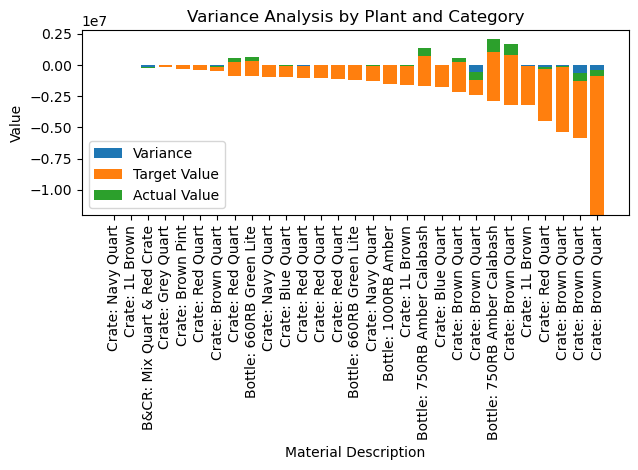

In [28]:

# Calculate the total variance for each combination of Plant and Material Description
variance_by_plant_category['Variance'] = variance_by_plant_category['Amount in LC'] - variance_by_plant_category['Target Value in LC']

# Sort the data by the total variance in descending order
variance_by_plant_category = variance_by_plant_category.sort_values('Variance', ascending=False)

# Create a waterfall chart
fig, ax = plt.subplots()
bar_labels = variance_by_plant_category.index.get_level_values('Material Description')
x_pos = np.arange(len(bar_labels))

# Plot the bars for variance
ax.bar(x_pos, variance_by_plant_category['Variance'], color='C0')

# Plot the bars for target value
ax.bar(x_pos, variance_by_plant_category['Target Value in LC'], bottom=variance_by_plant_category['Variance'], color='C1')

# Plot the bars for actual value
ax.bar(x_pos, variance_by_plant_category['Amount in LC'], bottom=variance_by_plant_category['Variance'] + variance_by_plant_category['Target Value in LC'], color='C2')

# Set chart title and labels
plt.title('Variance Analysis by Plant and Category')
plt.xlabel('Material Description')
plt.ylabel('Value')

# Add legend
ax.legend(['Variance', 'Target Value', 'Actual Value'])

# Rotate x-axis labels if needed
plt.xticks(x_pos, bar_labels, rotation=90)

# Display the chart
plt.tight_layout()
plt.show()
variance_by_plant_category.to_excel('variance_analysis.xlsx', index=True)


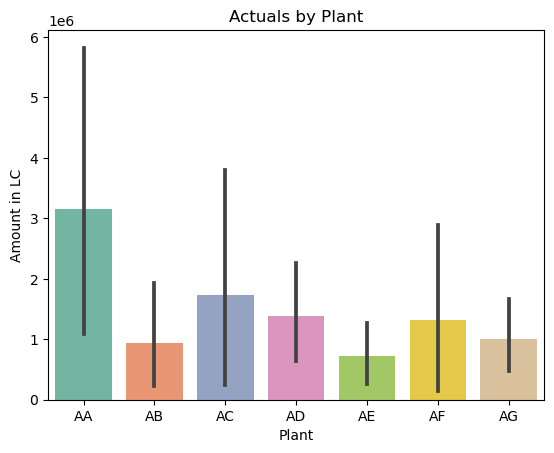

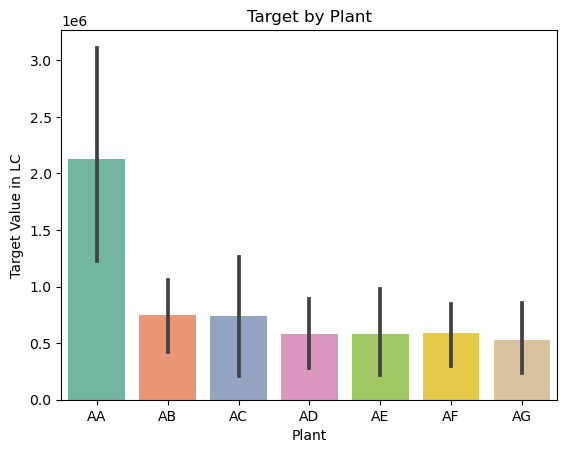

In [12]:


# Sort the dataframes by plant name
actuals_df_sorted = actuals_df.sort_values('Plant')
target_df_sorted = target_df.sort_values('Plant')
variance_by_plant_category_sorted = variance_by_plant_category.sort_values('Plant')

# Create a color mapping dictionary for consistent colors
plant_colors = {}
unique_plants = actuals_df_sorted['Plant'].unique()
color_palette = sns.color_palette("Set2", len(unique_plants))
for i, plant in enumerate(unique_plants):
    plant_colors[plant] = color_palette[i]

# Bar Chart - Actuals by Plant
sns.barplot(x='Plant', y='Amount in LC', data=actuals_df_sorted, palette=plant_colors.values())
plt.title('Actuals by Plant')
plt.xlabel('Plant')
plt.ylabel('Amount in LC')
plt.show()

# Bar Chart - Target by Plant
sns.barplot(x='Plant', y='Target Value in LC', data=target_df_sorted, palette=plant_colors.values())
plt.title('Target by Plant')
plt.xlabel('Plant')
plt.ylabel('Target Value in LC')
plt.show()




## 3. Trend analysis

## Since as timefame we only have year 2022 for all so we will not be able to do trend analysis, it will be straight line 

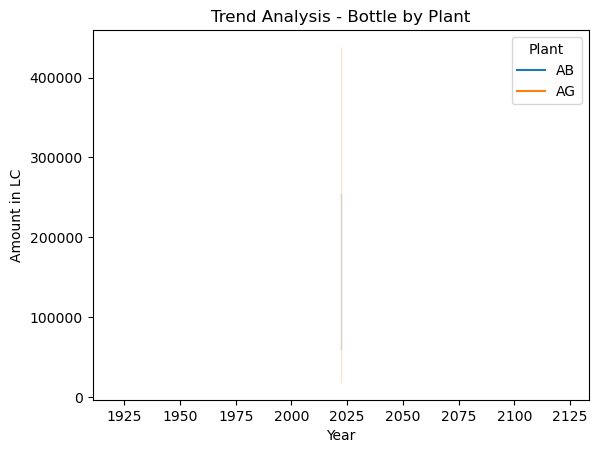

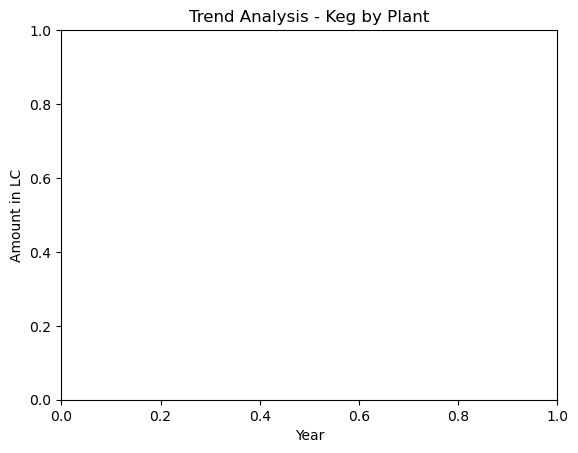

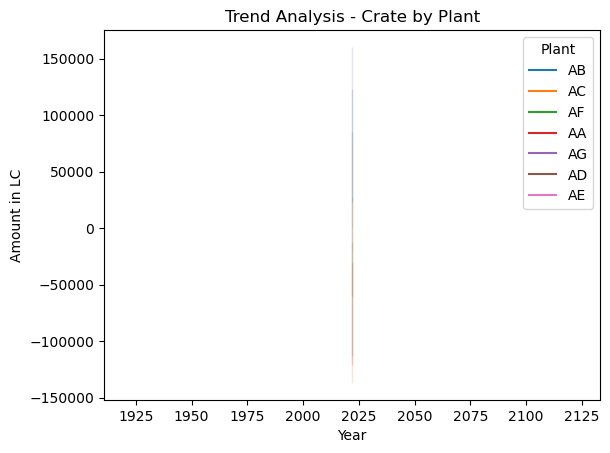

In [13]:


# Convert Material Description column to lowercase for case insensitivity
actuals_df['Material Description'] = actuals_df['Material Description'].str.lower()

# Filter the data by material description (Bottle, Keg, Crate)
bottle_data = actuals_df[actuals_df['Material Description'].str.contains('bottle:', case=False)].copy()
keg_data = actuals_df[actuals_df['Material Description'].str.contains('keg:', case=False)].copy()
crate_data = actuals_df[actuals_df['Material Description'].str.contains('crate:', case=False)].copy()

# Add a constant year column
bottle_data.loc[:, 'Year'] = 2022
keg_data.loc[:, 'Year'] = 2022
crate_data.loc[:, 'Year'] = 2022

# Line Plot - Bottle by Plant
sns.lineplot(x='Year', y='Amount in LC', hue='Plant', data=bottle_data)
plt.title('Trend Analysis - Bottle by Plant')
plt.xlabel('Year')
plt.ylabel('Amount in LC')
plt.show()

# Line Plot - Keg by Plant
sns.lineplot(x='Year', y='Amount in LC', hue='Plant', data=keg_data)
plt.title('Trend Analysis - Keg by Plant')
plt.xlabel('Year')
plt.ylabel('Amount in LC')
plt.show()

# Line Plot - Crate by Plant
sns.lineplot(x='Year', y='Amount in LC', hue='Plant', data=crate_data)
plt.title('Trend Analysis - Crate by Plant')
plt.xlabel('Year')
plt.ylabel('Amount in LC')
plt.show()


## 4. What should be your focus areas & periods to plan for smooth supply.



Let's group the data by Plant and Material Description, and then calculate the mean of the Variance column. We can then sort the resulting table by the Variance column to see which Plants and Material Descriptions have the highest variance. This will help us identify which areas need the most attention to plan for smooth supply.

In [29]:
focus_df = pd.read_csv('focus.csv')
print(focus_df)

    index Plant          Material Description  Amount in LC     Quantity  \
0      21    AG             Crate: Navy Quart -2.285296e+03    -154.8485   
1      16    AF   B&CR: Mix Quart & Red Crate -1.138886e+05   -3750.3030   
2      10    AD             Crate: Grey Quart -9.211364e+03    -634.8485   
3       5    AC             Crate: Brown Pint -1.091327e+04    -731.2121   
4      15    AE              Crate: Red Quart -5.022386e+03    -342.4242   
5       9    AD            Crate: Brown Quart -7.478311e+04   -5163.3333   
6       4    AB              Crate: Red Quart  2.821221e+05   19540.3030   
7      14    AE             Crate: Navy Quart -4.653932e+03    -315.4545   
8       8    AD             Crate: Blue Quart -1.590934e+04   -1096.0606   
9       7    AC              Crate: Red Quart -3.718759e+04   -2553.9394   
10     18    AF              Crate: Red Quart -1.168089e+04    -796.3636   
11     22    AG              Crate: Red Quart  3.175727e+03     223.9394   
12     11   

To plan for smooth supply, it is important to focus on the following areas:
- **Demand Forecasting**: Accurately forecasting demand is critical to ensure that the right amount of inventory is available to meet customer needs. This requires analyzing historical sales data, market trends, and other relevant factors to predict future demand.
- **Inventory Management**: Maintaining the right level of inventory is key to ensuring that supply meets demand. This involves tracking inventory levels, monitoring lead times, and optimizing reorder points to ensure that inventory is available when needed.
- **Supplier Management**: Building strong relationships with suppliers is important to ensure that they can provide the necessary materials and products on time and at the right price. This involves monitoring supplier performance, negotiating contracts, and developing contingency plans in case of supply chain disruptions.
- **Production Planning**: Efficient production planning is critical to ensure that products are manufactured in a timely and cost-effective manner. This involves analyzing production capacity, scheduling production runs, and optimizing production processes to minimize waste and maximize efficiency.

In terms of periods, it is important to plan for both short-term and long-term supply needs. Short-term planning involves ensuring that inventory levels are sufficient to meet immediate demand, while long-term planning involves forecasting demand and ensuring that the necessary resources are available to meet future needs. It is also important to monitor supply chain performance on an ongoing basis and adjust plans as needed to ensure that supply meets demand.

![image info](/Users/abhipatel/Desktop/ABinBev/Task1/quantity-vs-variance.png)

Looking at the scatter plot, we can see that there is a negative correlation between Quantity and Variance. This means that as Quantity increases, Variance tends to decrease. However, there are still some data points with high Variance even at high Quantity levels, so we can't say that Quantity is the only factor affecting Variance. We would need to look at other variables as well to get a more complete picture.

 The scatter plot shows a negative correlation between Quantity and Variance, meaning that as Quantity increases, Variance tends to decrease. However, there are still some data points with high Variance even at high Quantity levels, so we can't say that Quantity is the only factor affecting Variance. We would need to look at other variables as well to get a more complete picture.